# Ames房价数据集上的特征工程


Ames房价预测是Kaggle平台上的一个竞赛任务，需要根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。其中房屋的特征x共有79维，响应值y为每个房屋的销售价格（SalePrice）。

Kaggle官网上的任务说明请见：
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

由于房屋的属性较多，且房屋属性类型各异，该数据集有些属性的缺失值也比较多，因此本任务的任务之一是在该数据集上练习特征工程技巧。

Kaggle平台上kernel区有各个竞赛参数者分享的代码，大家可以学习。
下面的代码也参考了很多不同选手分享的代码，在此一并致谢。

特征说明：
SalesPrice：房屋售价（美元），这是要预测的目标变量。
MSSubClass：建筑类别,数据类型为整数，但实际上应该为类别型
MSZoning ：地区分类，类别型特征
LotFrontage：房屋到街道的直线距离（英尺）
LotArea ：土地的大小（平方英尺）
Street：所在道路的类型
Alley：所在巷通道的类型
LotShape ：房地产形状
LandContour：土地的平整性
Utilities：可用的工具
LotConfig：土地配置
LandSlope:财产的斜度
Neighborhood:市内的物理位置
Condition1: 靠近主干道或铁路
Condition2: 靠近主要道路或铁路（如果还有第二个）
BldgType: 住宅类型
HouseStyle: 住宅风格
OverallQual: 整体材质和完成品质
OverallCond: 总体条件评级
YearBuilt: 最初建造日期
YearRemodAdd: 重建日期
RoofStyle: 屋顶类型
RoofMatl: 屋顶材料
Exterior1st: 房屋外墙
Exterior2nd: 房屋外墙 (如果多于一种材料)
MasVnrType: 表层砌体（Masonry veneer）类型
MasVnrArea: 表层砌体面积（square feet）
ExterQual: 外部材料的质量
ExterCond: 外部材料的现状
Foundation: 地基类型
BsmtQual: 地下室高度
BsmtCond: 地下室的总体状况
BsmtExposure: Walkout或花园层地下室的墙壁
BsmtFinType1: 完成的地下室的质量
BsmtFinSF1: 第一类型（Type 1）完成面积面积（square feet）
BsmtFinType2: 第二类型完成面积(如果有)
BsmtFinSF2: Type 2 完成面积（square feet）
BsmtUnfSF: 未完成的地下室总面积（square feet）
TotalBsmtSF: 地下室总面积（square feet） 
Heating: 取暖类型
HeatingQC: 取暖质量和条件
CentralAir: 中央空调
Electrical: 电气系统
1stFlrSF: 第一层的面积（square feet）
2ndFlrSF: 第二层的面积（square feet）
LowQualFinSF:低质量完成的面积（square feet）（所有楼层）
GrLivArea: 地上居住面积（square feet）
BsmtFullBath: 地下室全浴室数目
BsmtHalfBath: 地下室半浴室数目
FullBath: 地上全浴室数
HalfBath: 地上半浴室数目
BedroomAbvGr: 地下室之上的卧室数目
KitchenAbvGr: 厨房数目
KitchenQual: 厨房质量
TotRmsAbvGrd: 地上房间总数(不包括浴室)
Functional: 家用（Home）功能性评级
Fireplaces: 壁炉的数目
FireplaceQu: 壁炉质量
GarageType: 车库位置
GarageYrBlt: 车库建造年份
GarageFinish: I车库内部装修
GarageCars: 车库大小（能停的车辆数目）
GarageArea: 车库大小（square feet）
GarageQual: 车库质量
GarageCond: 车库条件
PavedDrive: 铺设的车道
WoodDeckSF: 木头deck面积（square feet）
OpenPorchSF: 开放门廊面积（square feet）
EnclosedPorch: 封闭门廊面积（square feet）
3SsnPorch: 三季门廊面积（square feet）
ScreenPorch: 观景门廊（Screen porch）面积（square feet）
PoolArea: 游泳池面积（square feet）
PoolQC: 游泳池质量
Fence: 围栏质量
MiscFeature: 没被包含在其他类别的杂项功能
MiscVal: 杂项功能价值（$）
MoSold: 销售月份
YrSold: 销售年份
SaleType: 销售类型
SaleCondition: 销售条件

## 导入必要的工具包

In [13]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## 读入数据

数据预处理对训练数据和测试数据需进行同样处理，因此将二者一起读入

In [14]:
# 读入数据
train = pd.read_csv("Ames_House_train.csv")
train.head()
#print("train : " + str(train.shape))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
test = pd.read_csv("Ames_House_test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

很多属性有缺失值，
一些属性可根据其含义设置为缺省值
一些属性缺可将该属性缺失作为一个新的取值
一些属性可以将其丢弃

## 数据探索

In [17]:
#对数据值型特征，用常用统计量观察其分布
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [18]:
#对类别型特征，观察其取值范围及直方图
categorical_features = train.select_dtypes(include = ["object"]).columns
for col in categorical_features:
    print ('\n%s属性的不同取值和出现的次数'%col)
    print (train[col].value_counts())


MSZoning属性的不同取值和出现的次数
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street属性的不同取值和出现的次数
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley属性的不同取值和出现的次数
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape属性的不同取值和出现的次数
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour属性的不同取值和出现的次数
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities属性的不同取值和出现的次数
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig属性的不同取值和出现的次数
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope属性的不同取值和出现的次数
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood属性的不同取值和出现的次数
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel  

大多数类别型特征的取值并不是很多
一些特征的取值有序关系，可以将其变换为有序数字
其他的类别型特征可以采用独热编码（One hot encoding）/哑编码

## 特征工程

In [19]:
train.drop(['Id'], inplace = True, axis = 1)
test_id = test['Id']
test.drop(['Id'], inplace = True, axis = 1)

### 离群点检测

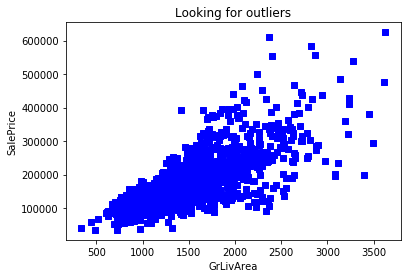

In [29]:
# 离群点检测（outliers），参考该数据集的介绍papper：https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#剔除离群点
train = train[train.GrLivArea < 4000]
temp = train.reindex()

散点图是一种直观发现outliers的方式。从上图中可以看出有2个极端的离群点在图的右下角（面积很大，但价格很低）。该数据集的提供者建议移除面积大于4000 square feet的数据点。
Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

删除了4个样本点

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 114 entries, MSSubClass to BoughtOffPlan
dtypes: float64(4), int64(64), object(46)
memory usage: 1.3+ MB


### 缺失值处理

In [22]:
# 有些特征，用median/mean or most common value 填充没有意义
# 因为特征工程对训练集和测试都需要进行，因此我们定义成函数，将数据集以参数形式传递
def process_missvalue_by_meaning (df):
    # Alley : data description says NA means "no alley access"
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")

    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)

    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)

    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")

    # Condition : NA most likely means Normal，靠近主干道或铁路
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")

    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)

    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")

    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")

    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)

    # Functional : data description says NA means typical，家用（Home）功能性评级
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")

    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)

    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)

    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")

    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)

    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")

    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)

    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")

    # MasVnrType : NA most likely means no veneer，表层砌体（Masonry veneer）类型
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)

    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)

    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")

    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)

    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")

    # ScreenPorch : NA most likely means no screen porch，观景门廊
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)

    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)

    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")

    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
    
    return df
    
train = process_missvalue_by_meaning(train)
test = process_missvalue_by_meaning(test)

In [23]:
# Some numerical features are actually really categories
# MSSubClass：建筑类
#MoSold：销售月份

def numberical2cat(df):
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }, inplace = True)

    return df
train = numberical2cat(train)
test = numberical2cat(test)

In [24]:
# Encode some categorical features as ordered numbers when there is information in the order
def cat2numberical(df):
    df.replace({"Alley" : {"None":0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                       inplace = True
                     )
    return df

train = cat2numberical(train)
test = cat2numberical(test)

### 还可以通过以下方式创建一些新特征 : 

 1. 简化已有特征
 2. 联合已有特征
 3. 现有重要特征（top 10）的多项式

In [25]:
# Create new features
# 1* Simplifications of existing features
# 合并类别
def simplify(df):
    df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    }, inplace = True)
    df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    },inplace = True)
    df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                           3 : 2, 4 : 2 # good
                                          },inplace = True)
    df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                        },inplace = True)
    df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        },inplace = True)
    df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    return df

train = simplify(train)
test = simplify(test)

In [26]:
# 2* Combinations of existing features
def Combine(df):
    # Overall quality of the house
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    # Overall quality of the garage
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    # Overall quality of the exterior
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    # Overall kitchen score
    df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
    # Overall fireplace score
    df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
    # Overall garage score
    df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
    # Overall pool score
    df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
    # Simplified overall quality of the house
    df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
    # Simplified overall quality of the exterior
    df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
    # Simplified overall pool score
    df["SimplPoolScore"] = df["PoolArea"] * df["SimplPoolQC"]
    # Simplified overall garage score
    df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
    # Simplified overall fireplace score
    df["SimplFireplaceScore"] = df["Fireplaces"] * df["SimplFireplaceQu"]
    # Simplified overall kitchen score
    df["SimplKitchenScore"] = df["KitchenAbvGr"] * df["SimplKitchenQual"]
    # Total number of bathrooms
    df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + \
    df["FullBath"] + (0.5 * df["HalfBath"])
    # Total SF for house (incl. basement)
    df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
    # Total SF for porch
    df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + \
    df["3SsnPorch"] + df["ScreenPorch"]
    # Has masonry veneer or not
    df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0})
    # House completed before sale or not
    df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    return df

#对训练集和测试集分别进行编码
train = Combine(train)
test = Combine(test)

In [32]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
#print(corr.SalePrice)

threshold = corr.SalePrice.iloc[11]  #the first one is SalePrice itself,from 1-11
print (threshold)
top10_cols = (corr.SalePrice[corr['SalePrice']>threshold]).axes
print(top10_cols)

Find most important features relative to target
0.6160276982770047
[Index(['SalePrice', 'AllSF', 'AllFlrsSF', 'GrLivArea', 'OverallQual',
       'GarageCars', 'TotalBsmtSF', 'GarageArea', 'TotalBath', 'ExterQual',
       '1stFlrSF'],
      dtype='object')]


In [33]:
# Create new features
# 3* Polynomials on the top 10 existing features
def Polynomials_top10(df, top10_cols):
    for i in range(1,11):
        new_cols_2 = top10_cols[0][i] + '_s' + str(2)
        new_cols_3 = top10_cols[0][i] + '_s' + str(3)
        new_cols_sq = top10_cols[0][i] + '_sq'
        
        df[new_cols_2] = df[top10_cols[0][i]] ** 2
        df[new_cols_3] = df[top10_cols[0][i]] ** 3
        df[new_cols_sq] = np.sqrt(df[top10_cols[0][i]]) 
        
    return df


train = Polynomials_top10(train, top10_cols)
test = Polynomials_top10(test,top10_cols)

In [35]:
#对训练集的其他数值型特征进行空缺值填补（中值填补）
#返回填补后的dataframe，以及每列的中值，用于填补测试集的空缺值
# 数值型特征还要进行数据标准化
from sklearn.preprocessing import StandardScaler
def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    numerical_features = numerical_features.drop("SalePrice")
    print("Numerical features : " + str(len(numerical_features)))

    df.info()
    df_num = df[numerical_features]
    #df_num.info()
    
    medians = df_num.median() 
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #df_num.info()
    # 分别初始化对特征和目标值的标准化器
    ss_X = StandardScaler()

    # 对训练特征进行标准化处理
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index)
    
    return df_num, medians, ss_X

train_num, medians, ss_X = fillna_numerical_train(train)

Numerical features : 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 144 entries, MSSubClass to 1stFlrSF_sq
dtypes: float64(16), int64(82), object(46)
memory usage: 1.6+ MB
NAs for numerical features in df : 81
Remaining NAs for numerical features in df : 0


In [36]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 97 columns):
LotFrontage       1456 non-null float64
LotArea           1456 non-null float64
Street            1456 non-null float64
Alley             1456 non-null float64
LotShape          1456 non-null float64
Utilities         1456 non-null float64
LandSlope         1456 non-null float64
OverallQual       1456 non-null float64
OverallCond       1456 non-null float64
YearBuilt         1456 non-null float64
YearRemodAdd      1456 non-null float64
MasVnrArea        1456 non-null float64
ExterQual         1456 non-null float64
ExterCond         1456 non-null float64
BsmtQual          1456 non-null float64
BsmtCond          1456 non-null float64
BsmtExposure      1456 non-null float64
BsmtFinType1      1456 non-null float64
BsmtFinSF1        1456 non-null float64
BsmtFinType2      1456 non-null float64
BsmtFinSF2        1456 non-null float64
BsmtUnfSF         1456 non-null float64
TotalBsmtSF  

In [38]:
#对测试集的其他数值型特征进行空缺值填补（用训练集中相应列的中值填补）
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    #numerical_features = numerical_features.drop("SalePrice")  #测试集中没有SalePrice
    print("Numerical features : " + str(len(numerical_features)))

    df_num = df[numerical_features]
    
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #对数值特征进行标准化
    temp = ss_X.transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index )
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features : 97
NAs for numerical features in df : 88
Remaining NAs for numerical features in df : 0


In [39]:
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    print("Categorical features : " + str(len(categorical_features)))
    df_cat = df[categorical_features]
    

    # Create dummy features for categorical values via one-hot encoding
    print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    df_cat = pd.get_dummies(df_cat,dummy_na=True)
    print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    return df_cat

#必须考虑类别型特征的取值范围（训练集和测试的取值范围可能不同）
#train_cat = get_dummies_cat(train)
#test_cat = get_dummies_cat(test)

n_train_samples = train.shape[0]  
train_test = pd.concat((train, test), axis=0)
train_test_cat = get_dummies_cat(train_test)
   
train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]

Categorical features : 46
NAs for categorical features in df : 61223
Remaining NAs for categorical features in df : 0


In [40]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 246 entries, BldgType_1Fam to SimplPoolScore_nan
dtypes: uint8(246)
memory usage: 361.2 KB


In [41]:
train_cat.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Condition1_Artery,...,SimplGarageQual_nan,SimplGarageScore_nan,SimplHeatingQC_nan,SimplKitchenQual_nan,SimplKitchenScore_nan,SimplOverallCond_nan,SimplOverallGrade_nan,SimplOverallQual_nan,SimplPoolQC_nan,SimplPoolScore_nan
0,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [43]:
# Join categorical and numerical features
def joint_num_cat(df_num, df_cat):
    df = pd.concat([df_num, df_cat], axis = 1, ignore_index=True)
    print("New number of features : " + str(df.shape[1]))
    
    return df

FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, train['SalePrice']], axis = 1)
FE_test = pd.concat([test_id,FE_test], axis = 1)

FE_train.to_csv('AmesHouse_FE_train.csv', index=False)
FE_test.to_csv('AmesHouse_FE_test.csv', index=False)

New number of features : 343
New number of features : 343


In [44]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 344 entries, 0 to SalePrice
dtypes: float64(97), int64(1), uint8(246)
memory usage: 1.4 MB


网上参考做法：http://www.sohu.com/a/141145826_572440